In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47a9492de94be05a37094596abe3157d


In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [16]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | dandong
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | batagay
Processing Record 12 of Set 1 | salalah
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | portland
Processing Record 20 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | sur
Processing Record 23 of Set 1 | masuguru
Processing Record 24 of Set 

Processing Record 40 of Set 4 | kaitangata
Processing Record 41 of Set 4 | dianopolis
City not found. Skipping...
Processing Record 42 of Set 4 | jumla
Processing Record 43 of Set 4 | jiroft
City not found. Skipping...
Processing Record 44 of Set 4 | boddam
Processing Record 45 of Set 4 | torbay
Processing Record 46 of Set 4 | nome
Processing Record 47 of Set 4 | san luis
Processing Record 48 of Set 4 | new norfolk
Processing Record 49 of Set 4 | vardo
Processing Record 50 of Set 4 | nantucket
Processing Record 1 of Set 5 | la trinidad
Processing Record 2 of Set 5 | shenkursk
Processing Record 3 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 5 | bredasdorp
Processing Record 5 of Set 5 | sofia
Processing Record 6 of Set 5 | vanimo
Processing Record 7 of Set 5 | faya
Processing Record 8 of Set 5 | hasaki
Processing Record 9 of Set 5 | nizwa
Processing Record 10 of Set 5 | grindavik
Processing Record 11 of Set 5 | inhambane
Processing Record 12 of Set 5 | bo

Processing Record 28 of Set 8 | ketchikan
Processing Record 29 of Set 8 | plettenberg bay
Processing Record 30 of Set 8 | areosa
Processing Record 31 of Set 8 | asau
Processing Record 32 of Set 8 | veraval
Processing Record 33 of Set 8 | santa cruz
Processing Record 34 of Set 8 | kupang
Processing Record 35 of Set 8 | balkhash
Processing Record 36 of Set 8 | necochea
Processing Record 37 of Set 8 | qaqortoq
Processing Record 38 of Set 8 | amderma
City not found. Skipping...
Processing Record 39 of Set 8 | gotemba
Processing Record 40 of Set 8 | ginir
Processing Record 41 of Set 8 | erzin
Processing Record 42 of Set 8 | korla
Processing Record 43 of Set 8 | lagoa
Processing Record 44 of Set 8 | stolin
Processing Record 45 of Set 8 | zhezkazgan
Processing Record 46 of Set 8 | pemba
Processing Record 47 of Set 8 | banjar
Processing Record 48 of Set 8 | san jose
Processing Record 49 of Set 8 | nemuro
Processing Record 50 of Set 8 | key west
Processing Record 1 of Set 9 | hohhot
Processing 

Processing Record 17 of Set 12 | trebukhiv
Processing Record 18 of Set 12 | okha
Processing Record 19 of Set 12 | ngozi
Processing Record 20 of Set 12 | lasa
Processing Record 21 of Set 12 | nortelandia
Processing Record 22 of Set 12 | college
Processing Record 23 of Set 12 | youkounkoun
Processing Record 24 of Set 12 | nishihara
Processing Record 25 of Set 12 | lyuban
Processing Record 26 of Set 12 | kaeo
Processing Record 27 of Set 12 | bandarbeyla
Processing Record 28 of Set 12 | vysokogornyy
Processing Record 29 of Set 12 | laguna
Processing Record 30 of Set 12 | meyungs
City not found. Skipping...
Processing Record 31 of Set 12 | savannah bight
Processing Record 32 of Set 12 | nguiu
City not found. Skipping...
Processing Record 33 of Set 12 | marcona
City not found. Skipping...
Processing Record 34 of Set 12 | marzuq
Processing Record 35 of Set 12 | kafanchan
Processing Record 36 of Set 12 | mayor pablo lagerenza
Processing Record 37 of Set 12 | kaniama
Processing Record 38 of Set

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,60.01,94,20,17.27,ZA,2021-05-15 19:27:51
1,Bengkulu,-3.8004,102.2655,76.26,90,79,4.54,ID,2021-05-15 19:30:51
2,Provideniya,64.3833,-173.3000,43.84,50,46,5.14,RU,2021-05-15 19:30:51
3,Butaritari,3.0707,172.7902,82.51,80,68,17.76,KI,2021-05-15 19:30:51
4,Port Alfred,-33.5906,26.8910,64.35,82,100,4.81,ZA,2021-05-15 19:30:52
5,Kodiak,57.7900,-152.4072,44.60,81,90,5.75,US,2021-05-15 19:30:52
6,Ushuaia,-54.8000,-68.3000,48.20,57,20,6.91,AR,2021-05-15 19:27:57
7,Dandong,40.1292,124.3947,53.01,91,100,1.99,CN,2021-05-15 19:30:52
8,Hobart,-42.8794,147.3294,48.20,71,90,12.66,AU,2021-05-15 19:30:03
9,Kapaa,22.0752,-159.3190,78.80,61,75,16.11,US,2021-05-15 19:30:52


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-05-15 19:27:51,-33.9258,18.4232,60.01,94,20,17.27
1,Bengkulu,ID,2021-05-15 19:30:51,-3.8004,102.2655,76.26,90,79,4.54
2,Provideniya,RU,2021-05-15 19:30:51,64.3833,-173.3000,43.84,50,46,5.14
3,Butaritari,KI,2021-05-15 19:30:51,3.0707,172.7902,82.51,80,68,17.76
4,Port Alfred,ZA,2021-05-15 19:30:52,-33.5906,26.8910,64.35,82,100,4.81
5,Kodiak,US,2021-05-15 19:30:52,57.7900,-152.4072,44.60,81,90,5.75
6,Ushuaia,AR,2021-05-15 19:27:57,-54.8000,-68.3000,48.20,57,20,6.91
7,Dandong,CN,2021-05-15 19:30:52,40.1292,124.3947,53.01,91,100,1.99
8,Hobart,AU,2021-05-15 19:30:03,-42.8794,147.3294,48.20,71,90,12.66
9,Kapaa,US,2021-05-15 19:30:52,22.0752,-159.3190,78.80,61,75,16.11


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

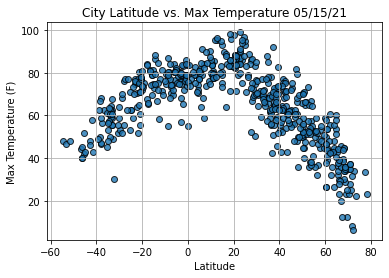

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

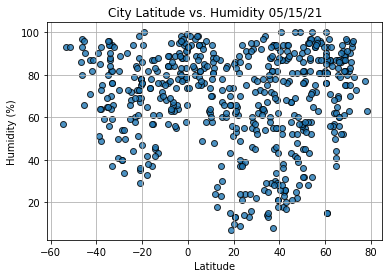

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

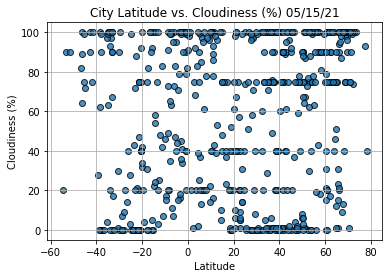

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

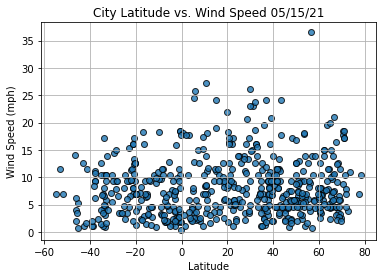

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()